# Q1. Monte carlo methods: TicTacToe

In [4]:
import _pickle as pickle
from TicTacToe import *

In [2]:
train_steps = 100000

## Implementation Details
### Base Agent and TD Agent
* Code for agents found in `haje01/gym-tictactoe` is adapted into `td_agent.py` and `base_agent.py`
* Running `python td_agent.py` will train `TdAgent` and save it in `td.pkl`. The agent is trained using the code provided in the repository itself.
### Monte Carlo Agent Implementation details
* For training `on policy MC` `epsilon-greedy` action is used with `epsilon=0.01`. 
* For training `off policy MC` `random-action` is used. All valid actions can be selected with equal probability.
* `Ordinary Importance Sampling` is implemented for `off policy MC`.
* For testing both on and off policy, `greedy-action` with `epsilon=0` is used.
* The models were trained for `10^5 episodes` and tested on `100` games every `100` games.
* Both the algorithms are implemented in Incremental Fashion as described in `Sutton and Barto (1998)` in Pages: 101 and 110.

## Q1.a. Against BaseAgent

In [3]:
from base_agent import BaseAgent
base_agent = BaseAgent('O')

In [4]:
a = Agent()
e_train = Env(a.get_epsilon_greedy_action, opponent_get_action=base_agent.act, env=TicTacToeEnv, player_first=True)
e_test = Env(a.get_action, opponent_get_action=base_agent.act, env=TicTacToeEnv, player_first=True)

In [5]:
unique_states_on, results_on = on_policy_monte_carlo(a, e_train, e_test, steps=train_steps,
                                                     gamma=1.0, results_every=100, no_games=100)

In [6]:
a = Agent()
e_train = Env(random_action, opponent_get_action=base_agent.act, env=TicTacToeEnv, player_first=True)
e_test = Env(a.get_action, opponent_get_action=base_agent.act, env=TicTacToeEnv, player_first=True)

In [7]:
unique_states_off, results_off = off_policy_monte_carlo(a, e_train, e_test, steps=train_steps,
                                                        gamma=1.0, results_every=100, no_games=100)

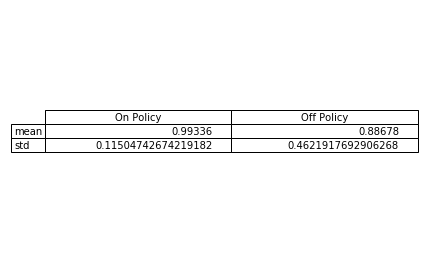

In [8]:
plot_table([results_on, results_off])

### Graph for No of Episodes vs Rewards against BaseAgent
* On policy MC performs better compared to Off policy.
* Off policy also has very high variance. This is probably due to the use of `Ordinary Sampling` since it has unbounded variance.
* Both the methods (On policy 98% and Off policy 89%) perform really well against BaseAgent.

(0, 1.1)

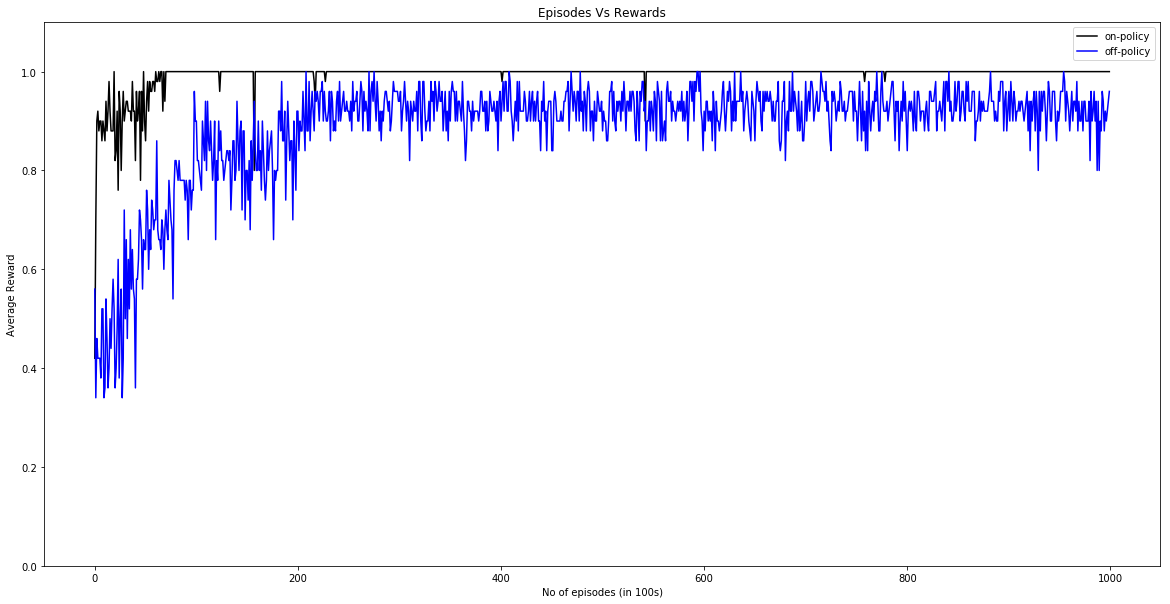

In [9]:
plt.figure(figsize=(20,10))
plot_mean_and_CI(results_on, 'k', None)
plot_mean_and_CI(results_off, 'b', None)
plt.legend(['on-policy', 'off-policy'])
plt.title('Episodes Vs Rewards')
plt.xlabel('No of episodes (in 100s)')
plt.ylabel('Average Reward')
plt.ylim((0, 1.1))

### Graph for No of No. of unique states vs Rewards against BaseAgent
**Note: Number of unique states were stored for every 100 episodes during training.**
* No of unique states visited in `off policy` is way higher than `On policy` method. This is due to the exploration power provided by the `behavioral policy` in `Off Policy`.
* While the number of visited states is less compared to `Off Policy`, `On Policy` has superior performance. This is probably because `On Policy` chose and explored Optimal moves way more than `Off Policy`.

Text(0, 0.5, 'Average Reward')

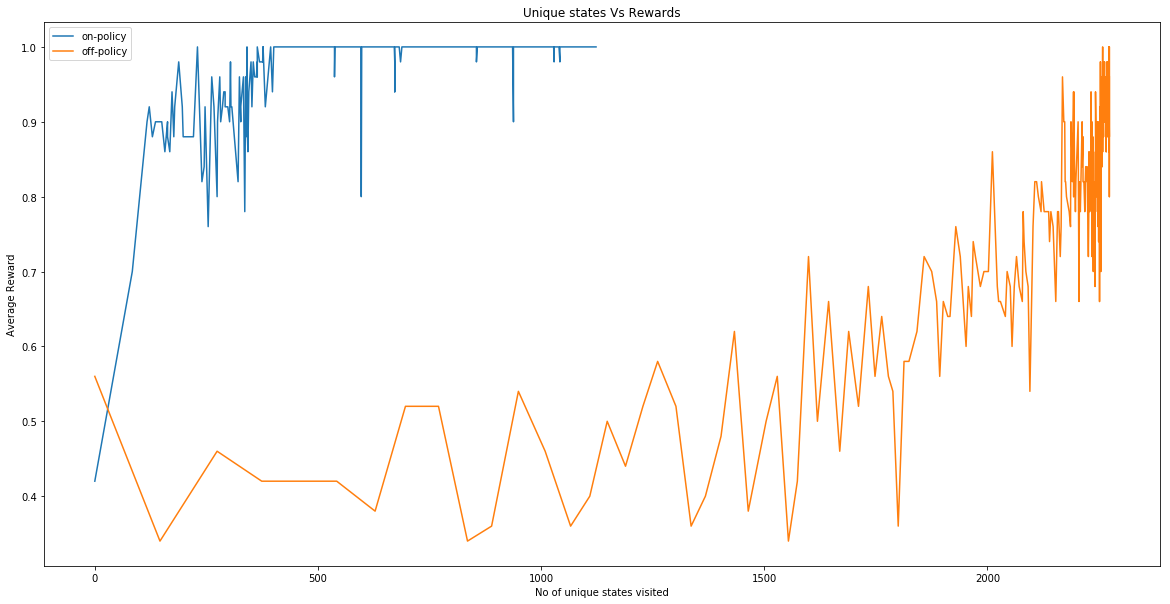

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(unique_states_on, np.mean(results_on, axis=-1))
plt.plot(unique_states_off, np.mean(results_off, axis=-1))
plt.legend(['on-policy', 'off-policy'])
plt.title('Unique states Vs Rewards')
plt.xlabel('No of unique states visited')
plt.ylabel('Average Reward')
#plt.ylim((0, 1.1))

## Q1.b. Against TD Agent (TdAgent)

In [11]:
from td_agent import TDAgent

In [12]:
td_agent = pickle.load(open('td.pkl', 'rb'))

In [13]:
a = Agent()
e_train = Env(a.get_epsilon_greedy_action, opponent_get_action=td_agent.greedy_action, env=TicTacToeEnv, player_first=True)
e_test = Env(a.get_action, opponent_get_action=td_agent.greedy_action, env=TicTacToeEnv, player_first=True)

In [14]:
unique_states_on, results_on = on_policy_monte_carlo(a, e_train, e_test, steps=train_steps,
                                                     gamma=1.0, results_every=100, no_games=100)

In [15]:
a = Agent()
e_train = Env(random_action, opponent_get_action=td_agent.greedy_action, env=TicTacToeEnv, player_first=True)
e_test = Env(a.get_action, opponent_get_action=td_agent.greedy_action, env=TicTacToeEnv, player_first=True)

In [16]:
unique_states_off, results_off = off_policy_monte_carlo(a, e_train, e_test, steps=train_steps,
                                                        gamma=1.0, results_every=100, no_games=100)

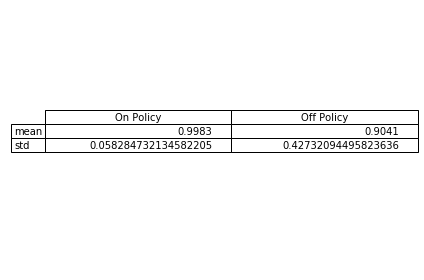

In [18]:
plot_table([results_on, results_off])

### Graph for No of Episodes vs Rewards against TD Agent
* The comparison b/w `On and Off Policy` are similar to those against BaseAgent
* The variance for `On Policy` against TdAgent is `10 times lower` than that against BaseAgent. This is probably due to the fact that TdAgent always selecting the optimal action which lead to lesser amount of Spaces to explore.
* Both the methods (On policy 98% and Off policy 89%) perform really well against TdAgent even though the TdAgent was a trained agent. **This shows how important the quality of episodes are in training.**

(0, 1.1)

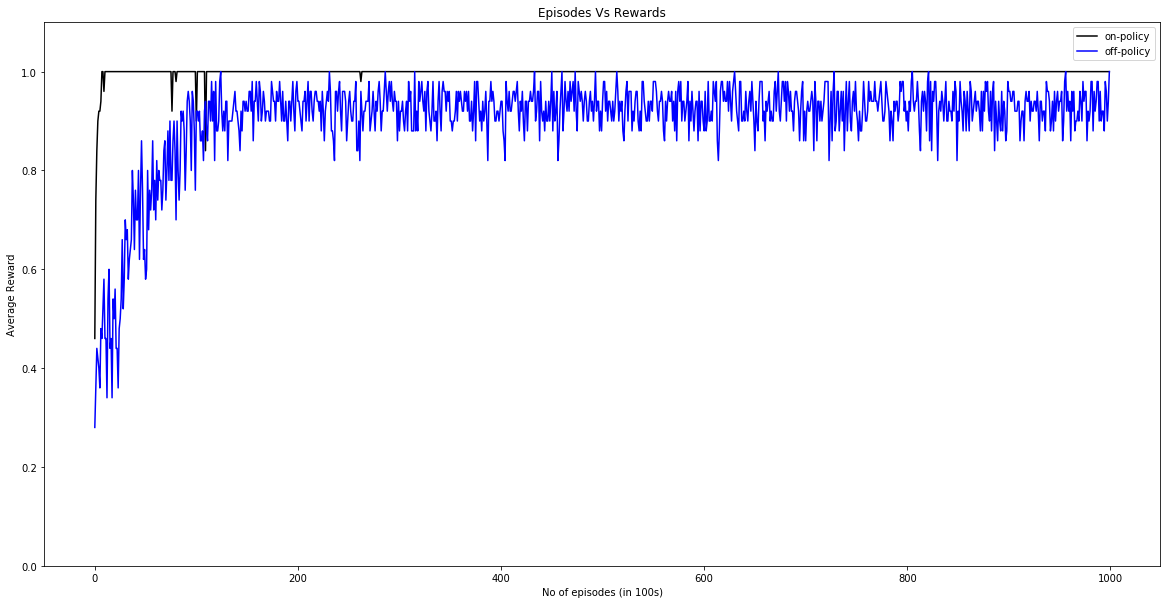

In [19]:
plt.figure(figsize=(20,10))
plot_mean_and_CI(results_on, 'k', None)
plot_mean_and_CI(results_off, 'b', None)
plt.legend(['on-policy', 'off-policy'])
plt.title('Episodes Vs Rewards')
plt.xlabel('No of episodes (in 100s)')
plt.ylabel('Average Reward')
plt.ylim((0, 1.1))

### Graph for No of No. of unique states vs Rewards against TD Agent
**Note: Number of unique states were stored for every 100 episodes during training.**
* The comparisions b/w `On and Off Policy` are similar to those against BaseAgent
* The variance for `On Policy` against TdAgent is `10 times lower` than that against BaseAgent. This is probably due to the fact that TdAgent always selecting the optimal action which lead to lesser amount of Spaces to explore.

Text(0, 0.5, 'Average Reward')

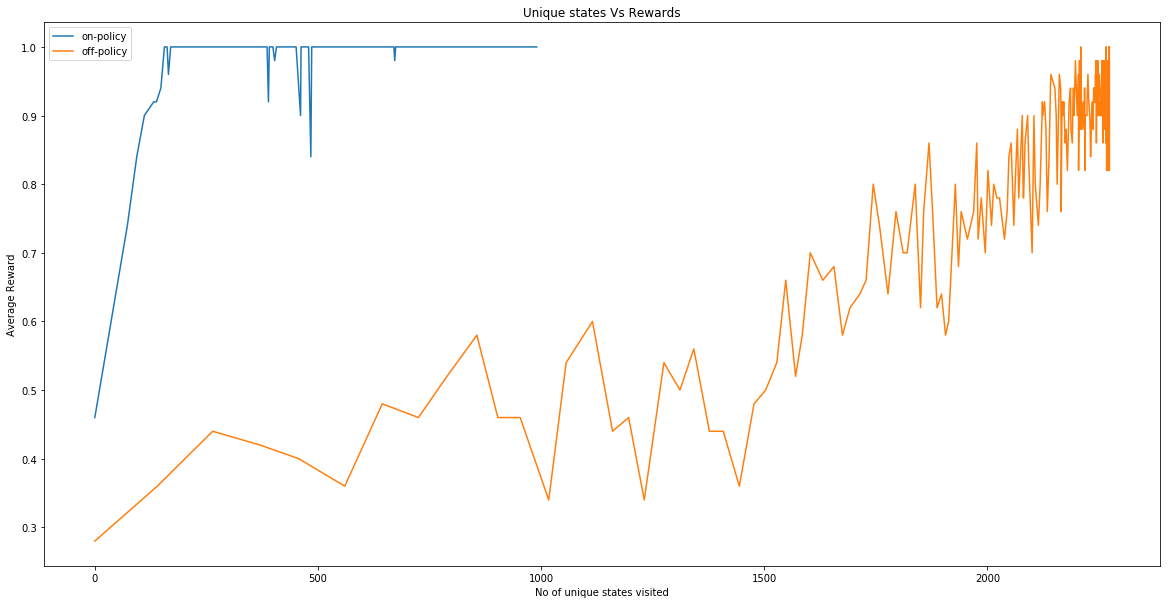

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(unique_states_on, np.mean(results_on, axis=-1))
plt.plot(unique_states_off, np.mean(results_off, axis=-1))
plt.legend(['on-policy', 'off-policy'])
plt.title('Unique states Vs Rewards')
plt.xlabel('No of unique states visited')
plt.ylabel('Average Reward')

# Q2. Temporal Difference methods: Frozen Lake

## Note on Environment
* This environment has very high probability for action selected to not be the same as action taken. The environment is highly non deterministic w.r.t. the agent. This affects the convergence considerably when the learning rate is constant. 
* Also experimented with variable alpha which decreases in value as no. of episodes increased during learning, this had better convergence and better performance on average.

In [74]:
import seaborn as sns
from FrozenLake import *

In [75]:
env = gym.make('FrozenLake8x8-v0')

## TD Learning
### Implementation details
* The Implementation is similar to that described in `Sutton and Barto (1998)` in Page: 130.
* Setting parameter `constant_alpha=True` and passing `alpha=<any value>` will implement the standard variant of the algorithm. Setting `constant_alpha=False` will implement degrading alpha. (See definition of function `td_learning` in FrozenLake.py). 

### Agents with constant alpha=0.01
* Also experimented with `alpha=0.1`, `alpha=0.9`, `alpha=0.5`, `alpha=0.05` and `variable alpha` rates. Due to the highly non-deterministic characteristic of the environment, lower alphas (`alpha=0.01`) perform better, followed by `variable alpha` rates

Text(0.5, 1.0, 'Visualisation: Sarsa Value function')

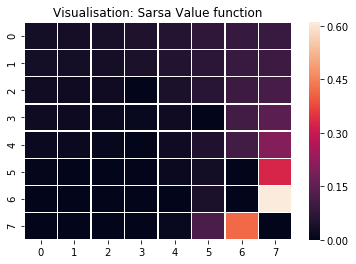

In [3]:
a = Agent()
s_rewards, _ = td_learning(a, env, update_func=sarsa, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=True, alpha=0.01)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Sarsa Value function')

Text(0.5, 1.0, 'Visualisation: Expected Sarsa Value function')

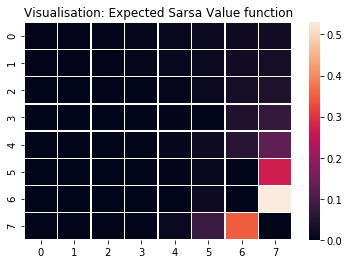

In [4]:
a = Agent()
es_rewards, _ = td_learning(a, env, update_func=expected_sarsa, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=True, alpha=0.01)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Expected Sarsa Value function')

Text(0.5, 1.0, 'Visualisation: Q-learning Value function')

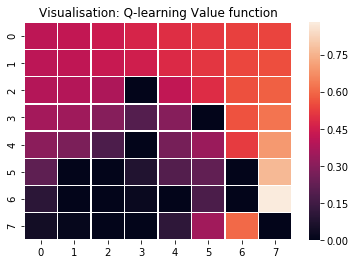

In [76]:
a = Agent()
q_rewards, _ = td_learning(a, env, update_func=q_learning, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=True, alpha=0.01)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Q-learning Value function')

### Comparision b/w different TD learning methods
* From the graphs, variance of Expected Sarsa seems to be very high compared to other methods. This is probably due to the nature of the environment, since the environment has high variance associated with each action, expectated Q-values perform poorly.
* `Q-Learning` has substantially higher average reward compared to variants of `sarsa`.

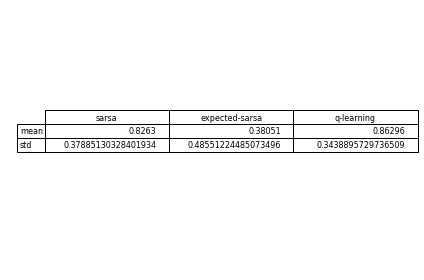

In [77]:
plot_table([s_rewards[1000:], es_rewards[1000:], q_rewards[1000:]], ['sarsa', 'expected-sarsa', 'q-learning'])

### Graph for no. of episodes vs Average Rewards

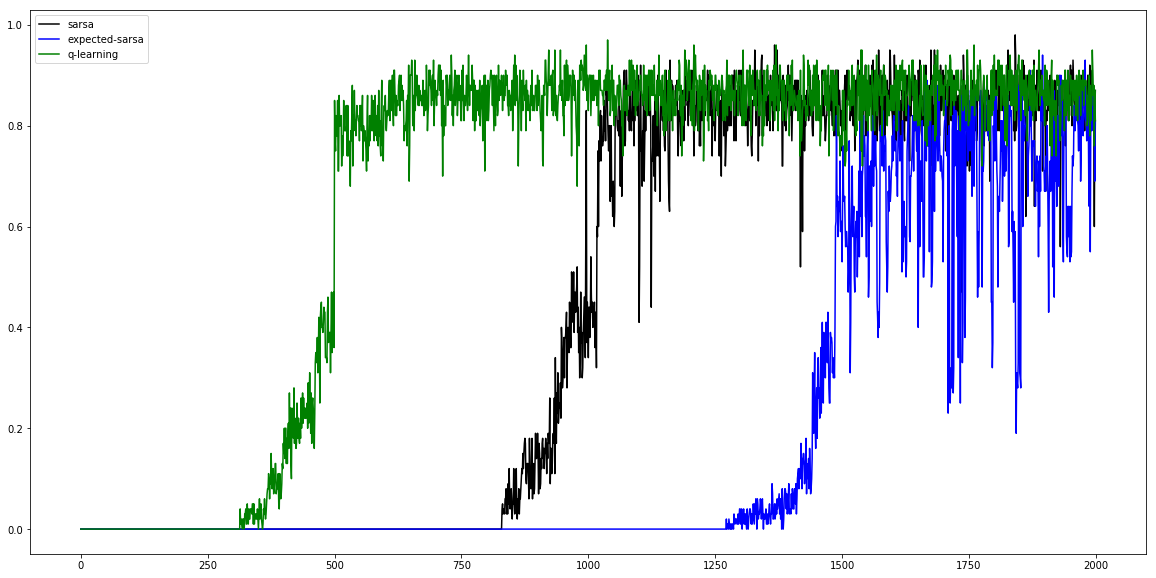

In [78]:
plt.figure(figsize=(20, 10))
plot_mean_and_CI(s_rewards, 'k', None)
plot_mean_and_CI(es_rewards, 'b', None)
plot_mean_and_CI(q_rewards, 'g', None)
plt.legend(['sarsa', 'expected-sarsa', 'q-learning'])

### Agents with variable Alpha rates
* LR is set to 1/n where n is the square root number of episodes covered in the training. 

Text(0.5, 1.0, 'Visualisation: Sarsa Value function')

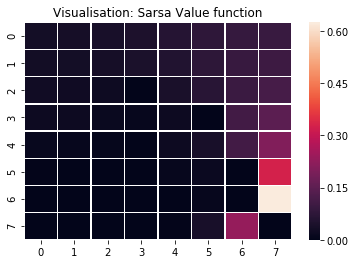

In [79]:
a = Agent()
s_rewards, _ = td_learning(a, env, update_func=sarsa, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=False)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Sarsa Value function')

Text(0.5, 1.0, 'Visualisation: Expected Sarsa Value function')

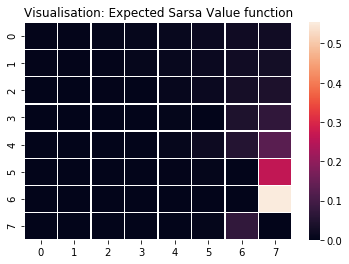

In [80]:
a = Agent()
es_rewards, _ = td_learning(a, env, update_func=expected_sarsa, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=False)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Expected Sarsa Value function')

Text(0.5, 1.0, 'Visualisation: Q-learning Value function')

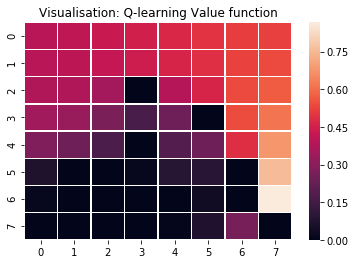

In [81]:
a = Agent()
q_rewards, _ = td_learning(a, env, update_func=q_learning, 
                             no_episodes=200000, gamma=0.99, 
                             results_every=100, no_games=100, max_steps=1000,
                             constant_alpha=False)
sns.heatmap(np.max(a.Q, axis=-1).reshape(8, 8), linewidths=0.5)
plt.title('Visualisation: Q-learning Value function')

### Comparision b/w different TD learning methods
* Here Sarsa performs the best compared to Q-learning and Expected Sarsa.
* Sarsa also has the lowest variance.
* All the models also took longer to converge using variable alpha rates. This is probably due to the high variance of Q-updates with higher alpha values (alpha values start at 1).

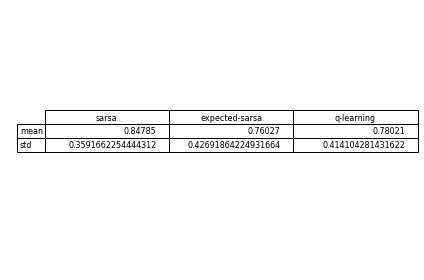

In [82]:
plot_table([s_rewards[1000:], es_rewards[1000:], q_rewards[1000:]], ['sarsa', 'expected-sarsa', 'q-learning'])

### Graph for no. of episodes vs Average Rewards

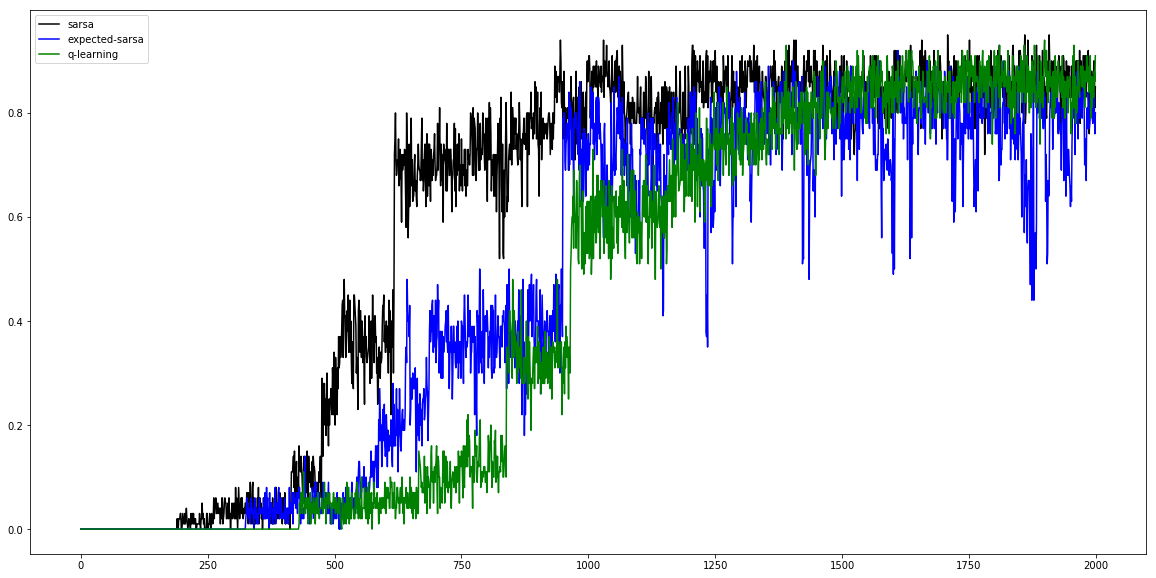

In [83]:
plt.figure(figsize=(20, 10))
plot_mean_and_CI(s_rewards, 'k', None)
plot_mean_and_CI(es_rewards, 'b', None)
plot_mean_and_CI(q_rewards, 'g', None)
plt.legend(['sarsa', 'expected-sarsa', 'q-learning'])

# Q3. Deep Q-learning: Atari breakout

Environment: Atari Breakout from OpenAI-gym

## Implementation Details 

**(same as Playing Atari with Reinforcement Learning paper)**

### Problem design details:

* The Agent can only chose an action every four frames. This action is repeated for the skipped frames. 
* The Agent is given a reward of + 1 whenever a block is destroyed and -1 whenever it loses 1 life (The game by default had 5 lives).

### Input processing:
* Each image from Atari game was compressed to 105x80.

![Actual](actual_env.png) ![Preprocessed: 80x80](processed_env_2.png)

### Model Input:
* Consists for four consecutive Frames.

![Input](model_input.png)

### Model Architecture:
![Model Architecture](model.png)
* Two Convolution layers followed by one fully connected layer and one linear layer.
* First Convolution layer: InChannels: 4, OutChannels: 16, Kernel Size: 8x8, Stride: 4
* Second Convolution layer: InChannels: 16, OutChannels: 32, Kernel Size: 4x4, Stride: 2
* Fully connected layer: Input Dim: 2048, Output Dim: 256
* Output layer: Input Dim: 256, Output Dim: 4

### Training:

* The model's **training objective**: Suppose the model takes action ***a*** at state ***s*** at time ***t***. Then, 
$
required\_value = Q_{t}(s_{t}, a) + \alpha * [R_{t} + max_{a \epsilon A(s)}(Q_{t}(s_{t+1}, a) - Q_{t}(s_{t}, a)] \\
predicted\_value = Q_{t}(s_{t}, a) \\
Loss function: Huber\_loss(required\_value, predicted\_value)
$
* The model was trained for the first 1 million iterations with variable epsilon decreasing from 1.0 to 0.1 linearly. Thereafter a constant epsilon of 0.1 is used.
* **Experience replay:** About 1 million recently visited states are cached and are sampled randomly during every training update. Minibatch of size 32 was used to train the model.
* **Target Network:** A special target network was used to get the required_value. This network was updated every 10,000 steps to DQN network's weights.

### Convergence Test:

* As explained in the paper, I created a random episode using a random policy and computed average Q values for the frames in the episode every 10,000 iterations. A plot of these scores shows convergence.

### Bonus:

* **Double Q leanring:** Two networks are trained together. At every iteration, one network is chosen to get the predicted values while one is chosen to get the required values. Only for the network chosen to get predicted values, gradients are computed and weights are updated.

### Code for training:

In [186]:
from atari import *

In [187]:
torch.cuda.set_device(0)

In [188]:
dqn = DQN()
target = DQN()
target.cuda()
dqn.cuda()

DQN(
  (conv1): Conv2d(4, 16, kernel_size=(8, 8), stride=(4, 4))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=2048, out_features=256, bias=True)
  (head2): Linear(in_features=256, out_features=4, bias=True)
)

## Code for training normal DQN

```
# Code for training: Uncomment and run
test_set = get_test_set()
r = RingBuffer()

scores = train(dqn, target, env, test_set=test_set, replay_buf=r, var_epsilon=True, gamma=0.99,
               max_epochs=10e5, test_every=1000, test_set=test_set, target_update_delay=10e3, 
               save_every=10e3)
for _ in range(4):
    scores.append(train(dqn, target, env, test_set=test_set, replay_buf=r, var_epsilon=False, gamma=0.99,
               max_epochs=10e5, test_every=1000, test_set=test_set, target_update_delay=10e3, 
               save_every=10e3))
```

### Code for training Double Q learning network

* The function call is similar to normal DQN training for Double Q learning.

```
test_set = get_test_set()
r = RingBuffer()

scores = train_q2(dqn, target, env, test_set=test_set, replay_buf=r, var_epsilon=True, gamma=0.99,
               max_epochs=10e5, test_every=1000, test_set=test_set, target_update_delay=10e3, 
               save_every=10e3)
for _ in range(4):
    scores.append(train_q2(dqn, target, env, test_set=test_set, replay_buf=r, var_epsilon=False, gamma=0.99,
               max_epochs=10e5, test_every=1000, test_set=test_set, target_update_delay=10e3, 
               save_every=10e3))
```

## Code for testing

* Returns frames and score of the model on a random episode. If given `save_as=<filename>`, the episode will be saved as a video with name **filename**.

In [189]:
dqn.load_state_dict(torch.load('models/dqn_nr_1000000.pkl'))

In [190]:
frames, score = test_model(dqn, save_as='project.mp4')
score

10

## Convergence Plots

**Normal DQN**

In [191]:
a = pickle.load(open('scores_r.pkl', 'rb'))

Text(0.5, 1.0, 'Convergence Plot for normal DQN')

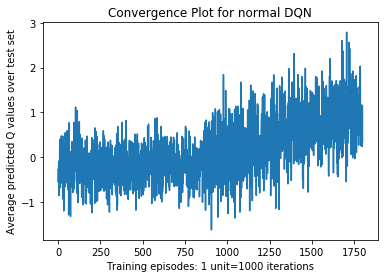

In [192]:
plt.plot(a)
plt.xlabel('Training episodes: 1 unit=1000 iterations')
plt.ylabel('Average predicted Q values over test set')
plt.title('Convergence Plot for normal DQN')

**Double Q learning DQN**

In [193]:
a = pickle.load(open('scores_dq2.pkl', 'rb'))

Text(0.5, 1.0, 'Convergence Plot for Double Q leanring')

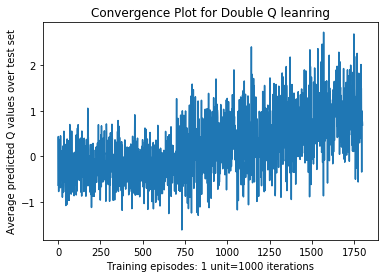

In [194]:
plt.plot(a)
plt.xlabel('Training episodes: 1 unit=1000 iterations')
plt.ylabel('Average predicted Q values over test set')
plt.title('Convergence Plot for Double Q leanring')

**References:**

* Model architecture image credits: [medium.com/@awjuliani/...](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-4-deep-q-networks-and-beyond-8438a3e2b8df)
* Paper Implemented: [Playing Atari with Deep Reinforcement Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)
* Experience replay and Target Network: [towardsdatascience.com/...](https://towardsdatascience.com/welcome-to-deep-reinforcement-learning-part-1-dqn-c3cab4d41b6b)
* Double Q-learning reference: [towardsdatascience.com/...](https://towardsdatascience.com/double-q-learning-the-easy-way-a924c4085ec3)
